___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option("display.max_rows", 2000)
pd.set_option("display.max_columns", 2000)
pd.set_option("display.width", 2000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#### *ii. Load Dataset*

In [8]:
df = pd.read_csv("treetypes39k.csv")

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [9]:
df.shape

(39000, 55)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39000 entries, 0 to 38999
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           39000 non-null  int64
 1   Aspect                              39000 non-null  int64
 2   Slope                               39000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    39000 non-null  int64
 4   Vertical_Distance_To_Hydrology      39000 non-null  int64
 5   Horizontal_Distance_To_Roadways     39000 non-null  int64
 6   Hillshade_9am                       39000 non-null  int64
 7   Hillshade_Noon                      39000 non-null  int64
 8   Hillshade_3pm                       39000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  39000 non-null  int64
 10  Wilderness_Area_1                   39000 non-null  int64
 11  Wilderness_Area_2                   39000 non-null  int64
 12  Wild

In [11]:
df.isnull().any().any()

False

In [12]:
df.duplicated().sum()

49

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(38951, 55)

In [15]:
df.head().T

,0,1,2,3,4
Elevation,3176,3221,3237,3106,3631
Aspect,53,77,302,34,29
Slope,19,11,9,18,22
Horizontal_Distance_To_Hydrology,624,626,495,684,716
Vertical_Distance_To_Hydrology,128,46,53,-65,219
Horizontal_Distance_To_Roadways,1620,4076,371,4254,2851
Hillshade_9am,227,234,194,215,206
Hillshade_Noon,195,220,236,199,186
Hillshade_3pm,94,117,181,114,107
Horizontal_Distance_To_Fire_Points,3342,2761,1784,4325,1356


In [16]:
for column in df.columns:
    print(f"Column Name : {column}")
    print(f"Number of Unique: {df[column].nunique()}")
    print(df[column].unique())
    print("\n")

Column Name : Elevation
Number of Unique: 1804
[3176 3221 3237 ... 3841 3684 3762]


Column Name : Aspect
Number of Unique: 361
[ 53  77 302  34  29  83 330 126 358  17  32  45  96  66 213  56  36  59
  23 331   5  28 336 317  43  90  89 255 158 114 125 244  33  18  80  16
 147  48 284  97 115  92  22 117 121  42 309 325 305 122 335  58 136  50
 324  49  79 316 189 222 110 351 312  46 113 124 281  78 356 288 142 203
 225  47 143 161 293 272  62 333  20 320 275 135 123  12 106 344  70 118
 300  11 352  75 294  51  21 354 111 130 156  76  68  61 202 319 323  93
 355  41  99 173 151 307 180 289 315 197   6 101  81  27   8 100  26 291
 353  14 296 314 109 198 103  63 228 346  91  82 154  37 321 304 133   0
 145  38  24 301 193 107  57 311 332 206 199   4 337 357 269 230 345 274
 165 176 241 285 229 279 190 338   1 175  85 268 178  86  65 216 155 339
  31 328 227 217 340 245 141 140   3  98 298 184 159 102 329  35  40 194
  52 347 261   9 277  72 127 266 131 326 138  25 170 152 196 177 322 

In [17]:
df.drop(columns="Soil_Type_15", inplace=True)

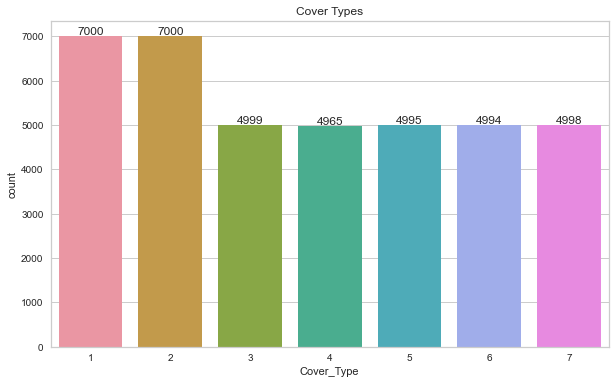

In [18]:
ax = sns.countplot(x = "Cover_Type", data=df)

for i in ax.containers:
    ax.bar_label(i)
    
plt.title("Cover Types");

# Dağılımda imbalance bir durum yok ancak stratify =y kullanılabilir.

In [19]:
df.corr()["Cover_Type"].sort_values(ascending=False)

Cover_Type                            1.000
Soil_Type_38                          0.238
Soil_Type_39                          0.225
Soil_Type_40                          0.181
Soil_Type_10                          0.152
Wilderness_Area_4                     0.148
Slope                                 0.111
Wilderness_Area_3                     0.110
Soil_Type_35                          0.100
Vertical_Distance_To_Hydrology        0.092
Soil_Type_37                          0.066
Soil_Type_17                          0.055
Soil_Type_6                           0.035
Soil_Type_36                          0.032
Soil_Type_5                           0.032
Soil_Type_2                           0.029
Soil_Type_13                          0.029
Soil_Type_14                          0.029
Soil_Type_1                           0.026
Soil_Type_3                           0.013
Soil_Type_18                          0.009
Soil_Type_11                          0.009
Aspect                          

In [20]:
def color_red(val):
    if abs(val) > 0.90 and abs(val) < 0.99:
        color = "red"
    else:
        color = "black"
    return f"color: {color}"

In [21]:
df.corr().T.style.applymap(color_red)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
Elevation,1.000000,-0.012962,-0.325194,0.413312,0.117553,0.568038,0.104191,0.228583,0.094982,0.420864,0.327831,0.254186,0.322367,-0.782131,-0.189800,-0.136626,-0.297211,-0.106176,-0.136315,-0.182302,0.002444,0.004347,-0.012910,-0.345381,-0.041636,0.014275,0.031103,-0.108962,-0.048685,-0.161682,-0.036101,0.035129,0.001441,0.023784,0.153102,0.162446,0.085347,0.016576,0.013882,0.030878,-0.002038,0.174107,0.041840,0.094415,0.172776,0.121526,0.023518,0.111766,0.032178,0.061053,0.299391,0.263796,0.275670,-0.066379
Aspect,-0.012962,1.000000,0.038949,0.041598,0.056348,0.036232,-0.599347,0.323017,0.636370,-0.075563,-0.143169,0.038767,0.050029,0.069913,-0.014146,-0.023172,-0.063649,0.013615,0.005222,-0.006006,0.003587,-0.002646,-0.015254,0.126216,-0.047688,-0.044016,0.044664,-0.002273,0.028857,0.025649,-0.038526,0.004903,-0.030130,0.025277,0.015400,0.030059,0.009452,-0.002335,-0.001264,0.008256,0.019146,-0.063254,-0.076465,-0.003606,0.030633,0.022711,0.020383,-0.019380,0.001764,-0.041576,0.044384,-0.045636,0.010128,0.007180
Slope,-0.325194,0.038949,1.000000,-0.061504,0.268381,-0.283111,-0.207171,-0.604283,-0.318174,-0.240801,-0.176623,-0.065318,-0.089209,0.300606,0.112836,-0.082873,0.285044,0.097431,0.090780,-0.038627,-0.011252,-0.020124,-0.024312,0.260029,-0.100737,-0.124296,0.140096,-0.036865,-0.040253,-0.102525,-0.060292,-0.057341,-0.066958,-0.023695,-0.074570,-0.189097,0.025192,0.011372,-0.036069,0.018134,0.032931,-0.103521,0.120089,-0.064110,-0.152441,0.094953,-0.018983,-0.041310,-0.004188,0.000152,-0.148374,0.056860,-0.037466,0.110559
Horizontal_Distance_To_Hydrology,0.413312,0.041598,-0.061504,1.000000,0.643214,0.188232,-0.029150,0.084014,0.081146,0.149846,-0.006579,0.086496,0.193997,-0.240466,-0.059374,0.018703,-0.081836,-0.039101,-0.006576,0.010449,0.004993,0.001249,-0.004452,-0.100403,0.024634,0.034078,0.021960,-0.083907,-0.063158,-0.126899,-0.007374,-0.018264,-0.062592,-0.023239,-0.008936,-0.079980,0.041397,0.006777,0.036501,0.046279,0.021046,0.030281,-0.022474,0.064951,0.119840,0.072793,0.064951,-0.001758,0.074752,-0.014049,0.119178,0.067923,0.237274,-0.013913
Vertical_Distance_To_Hydrology,0.117553,0.056348,0.268381,0.643214,1.000000,-0.009366,-0.099195,-0.133080,-0.034053,-0.027867,-0.121747,0.008444,0.080405,0.029911,-0.013207,-0.002004,0.081503,0.008977,0.033378,0.080505,-0.004217,-0.010361,-0.018138,0.027464,-0.032764,-0.034995,0.092344,-0.063512,-0.052360,-0.124680,-0.036648,-0.037122,-0.065786,-0.019150,-0.061186,-0.146299,0.025574,-0.007844,-0.008829,0.041712,0.039770,-0.066915,0.016401,0.003508,0.016495,0.092134,0.039519,-0.007353,0.009887,-0.019879,-0.020137,0.062972,0.222576,0.092278
Horizontal_Distance_To_Roadways,0.568038,0.036232,-0.283111,0.188232,-0.009366,1.000000,0.021852,0.239583,0.155915,0.461122,0.410181,-0.098212,0.071655,-0.439883,-0.107823,-0.090323,-0.152968,-0.087804,-0.084237,-0.134369,0.014766,0.027299,-0.021526,-0.208124,-0.071096,0.096305,-0.004275,-0.061765,-0.012192,-0.063009,-0.042493,0.061878,0.039826,-0.003769,0.111427,0.108347,0.010937,-0.013701,0.026218,0.016130,-0.013927,0.299119,-0.035006,0.017125,0.024858,0.022754,0.021080,0.047647,0.023298,0.049859,0.176715,0.088308,0.114953,-0.157194
Hillshade_9am,0.104191,-0.599347,-0.

In [22]:
for column in df.columns:
    if abs(df["Cover_Type"].corr(df[column])) < 0.05:
        df = df.drop(columns = column)

In [23]:
df.shape

(38951, 26)

***
***

In [24]:
df2 = df.copy()

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [25]:
df.isnull().sum().sum()

0

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

In [26]:
df.head()

,Elevation,Slope,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_10,Soil_Type_12,Soil_Type_17,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_29,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_35,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,3176,19,128,1620,195,94,3342,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,3221,11,46,4076,220,117,2761,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,3237,9,53,371,236,181,1784,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,3106,18,-65,4254,199,114,4325,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,3631,22,219,2851,186,107,1356,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


### Deal with Outliers

#### *ii. Drop Outliers*

In [27]:
len(df.loc[:, "Elevation" : "Horizontal_Distance_To_Fire_Points"].columns)

7

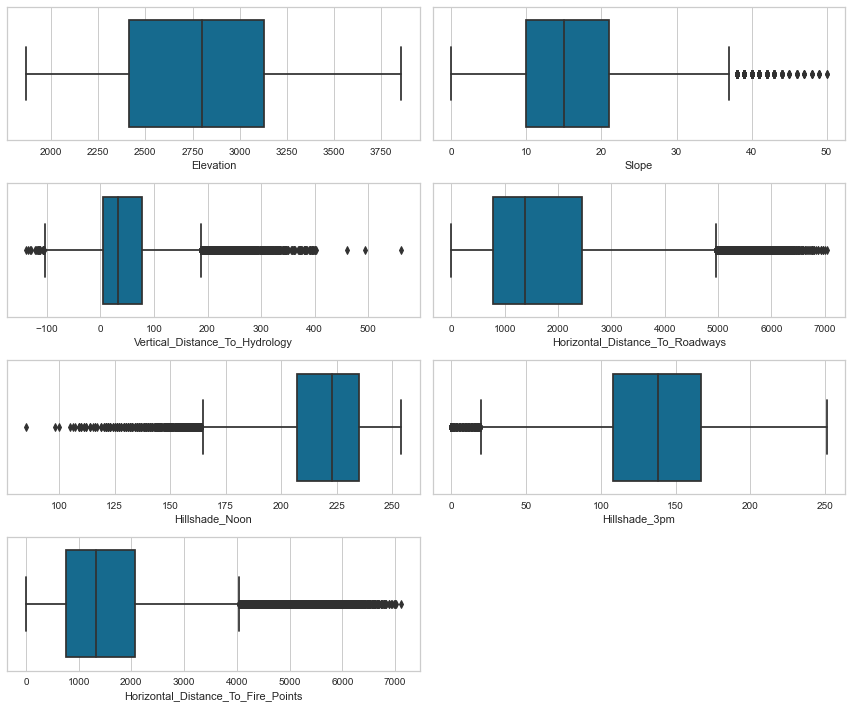

In [28]:
plt.figure(figsize=(12,10))
i = 1
for column in df.loc[:, "Elevation" : "Horizontal_Distance_To_Fire_Points"].columns:
    plt.subplot(4,2,i)
    sns.boxplot(x =df[column])
    i+=1 
    plt.tight_layout()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38951 entries, 0 to 38999
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           38951 non-null  int64
 1   Slope                               38951 non-null  int64
 2   Vertical_Distance_To_Hydrology      38951 non-null  int64
 3   Horizontal_Distance_To_Roadways     38951 non-null  int64
 4   Hillshade_Noon                      38951 non-null  int64
 5   Hillshade_3pm                       38951 non-null  int64
 6   Horizontal_Distance_To_Fire_Points  38951 non-null  int64
 7   Wilderness_Area_1                   38951 non-null  int64
 8   Wilderness_Area_3                   38951 non-null  int64
 9   Wilderness_Area_4                   38951 non-null  int64
 10  Soil_Type_10                        38951 non-null  int64
 11  Soil_Type_12                        38951 non-null  int64
 12  Soil

In [30]:
numeric = list(df.columns[:7])
numeric

['Elevation',
 'Slope',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

<Figure size 720x864 with 0 Axes>

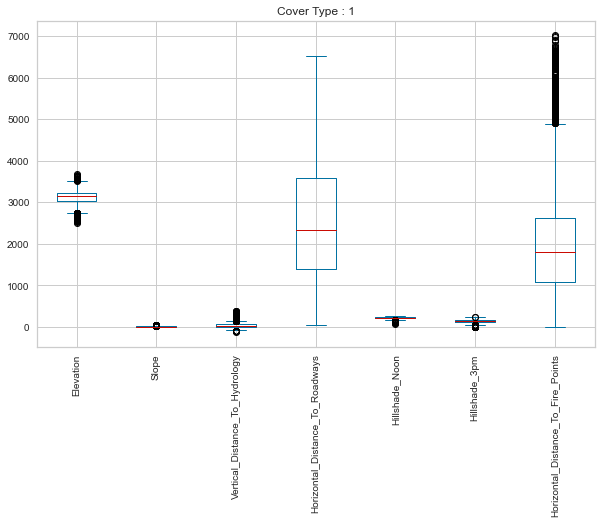

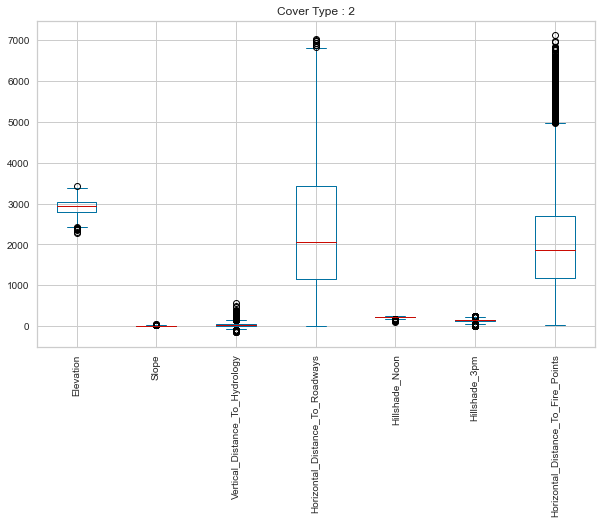

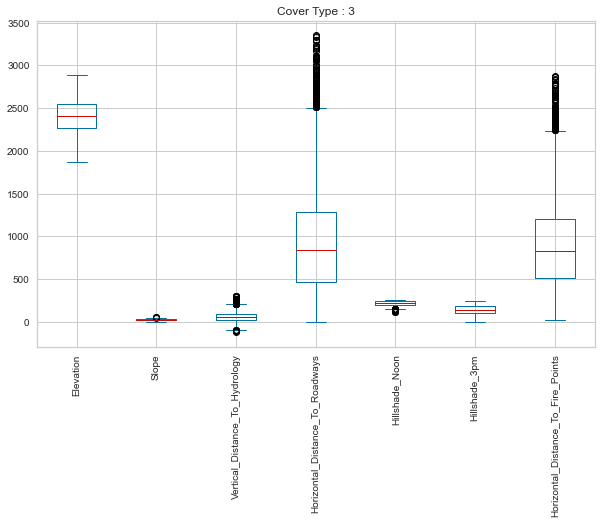

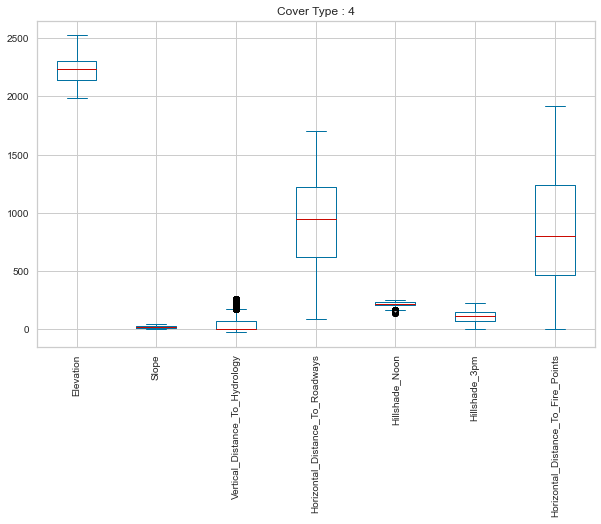

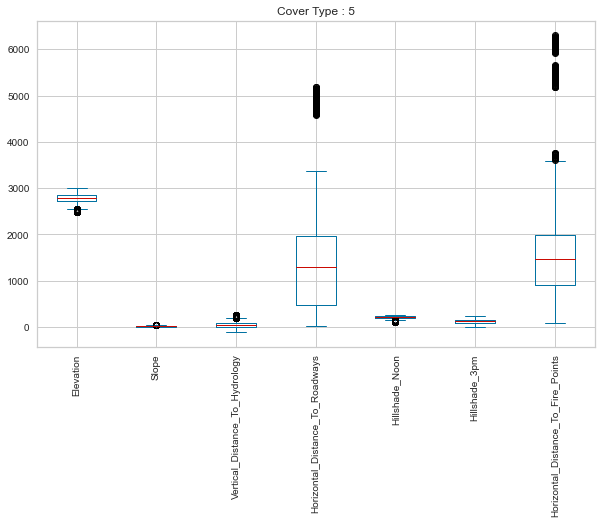

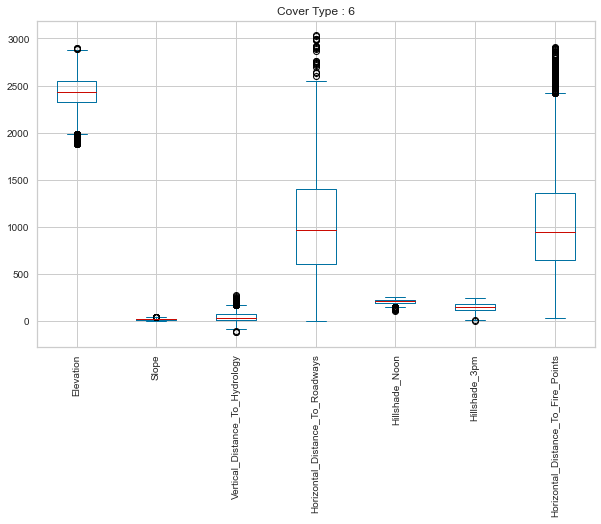

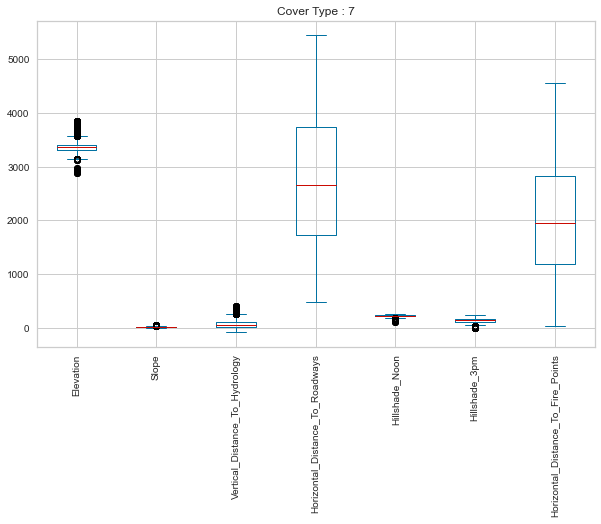

In [31]:
plt.figure(figsize=(10,12))
for i in list(df["Cover_Type"].unique()):
    df.loc[df["Cover_Type"] == i][numeric].plot(kind="box")
    plt.title(f"Cover Type : {i}")
    plt.xticks(rotation=90);

### Now, let's take a closer look at correlation of continuous columns.

***
***

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.compose import make_column_transformer

from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

from yellowbrick.classifier import ROCAUC

In [33]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [34]:
X = df.drop(columns="Cover_Type")
y = df["Cover_Type"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [223]:
from sklearn.svm import LinearSVC, SVC

In [224]:
operations = [("scaler", StandardScaler()), ("SVC", LinearSVC(random_state=42))]
pipe_model = Pipeline(steps = operations)

In [225]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC', LinearSVC(random_state=42))])

In [226]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[959 206   7   0  52  22 154]
 [381 692  47   0 180  88  12]
 [  0   4 223 237 234 302   0]
 [  0   0  17 935   0  41   0]
 [ 43 211  39   0 622  84   0]
 [  0  37 111 160  99 592   0]
 [136   4   0   0   4   0 856]]
              precision    recall  f1-score   support

           1       0.63      0.69      0.66      1400
           2       0.60      0.49      0.54      1400
           3       0.50      0.22      0.31      1000
           4       0.70      0.94      0.80       993
           5       0.52      0.62      0.57       999
           6       0.52      0.59      0.56       999
           7       0.84      0.86      0.85      1000

    accuracy                           0.63      7791
   macro avg       0.62      0.63      0.61      7791
weighted avg       0.62      0.63      0.61      7791


Train_Set
[[3774  936   12    0  191   77  610]
 [1492 2792  180   12  765  281   78]
 [   0   29  963  886  907 1214    0]
 [   0    0  126 3708    0  138    0]
 [ 219  785  

In [227]:
param_grid = {
    "SVC__C" : [0.001, 0.05, 0.01, 0.1],
}

In [228]:
operations = [("scaler", StandardScaler()), ("SVC", LinearSVC(class_weight="balanced", random_state=42))]
pipe_model = Pipeline(steps = operations)

svm_model_grid = GridSearchCV(estimator=pipe_model, param_grid=param_grid, scoring="f1", cv = 5, n_jobs=-1)

In [229]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC',
                                        LinearSVC(class_weight='balanced',
                                                  random_state=42))]),
             n_jobs=-1, param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1]},
             scoring='f1')

In [230]:
svm_model_grid.best_params_

{'SVC__C': 0.001}

In [231]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[919 229   7   0  74  17 154]
 [379 656  54   1 218  73  19]
 [  0   1 156 282 274 287   0]
 [  0   0   7 943   0  43   0]
 [ 53 180  35   0 677  54   0]
 [  2  34  82 202 132 547   0]
 [158  11   0   0  11   0 820]]
              precision    recall  f1-score   support

           1       0.61      0.66      0.63      1400
           2       0.59      0.47      0.52      1400
           3       0.46      0.16      0.23      1000
           4       0.66      0.95      0.78       993
           5       0.49      0.68      0.57       999
           6       0.54      0.55      0.54       999
           7       0.83      0.82      0.82      1000

    accuracy                           0.61      7791
   macro avg       0.60      0.61      0.59      7791
weighted avg       0.60      0.61      0.58      7791


Train_Set
[[3616  988    9    0  294   67  626]
 [1465 2639  187   24  948  251   86]
 [   0    9  671 1085 1091 1143    0]
 [   0    0   50 3769    0  153    0]
 [ 257  613  

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [232]:
from sklearn.tree import DecisionTreeClassifier

In [233]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

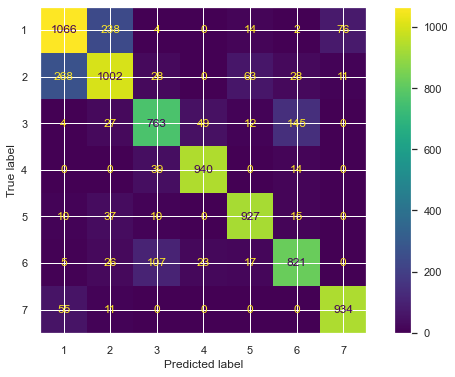

In [234]:
plot_confusion_matrix(dt_model, X_test, y_test)

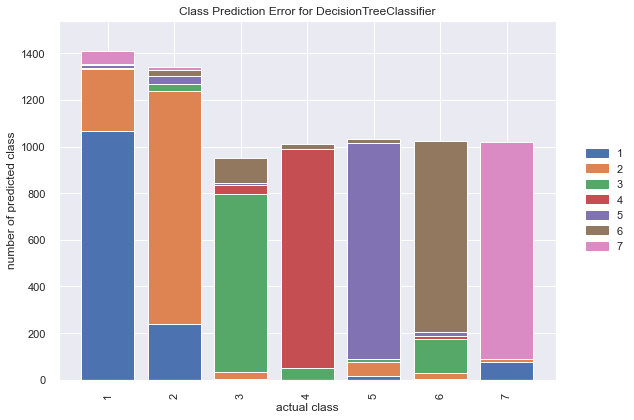

In [235]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(dt_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

In [236]:
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[1066  238    4    0   14    2   76]
 [ 268 1002   28    0   63   28   11]
 [   4   27  763   49   12  145    0]
 [   0    0   39  940    0   14    0]
 [  10   37   10    0  927   15    0]
 [   5   26  107   23   17  821    0]
 [  55   11    0    0    0    0  934]]
              precision    recall  f1-score   support

           1       0.76      0.76      0.76      1400
           2       0.75      0.72      0.73      1400
           3       0.80      0.76      0.78      1000
           4       0.93      0.95      0.94       993
           5       0.90      0.93      0.91       999
           6       0.80      0.82      0.81       999
           7       0.91      0.93      0.92      1000

    accuracy                           0.83      7791
   macro avg       0.84      0.84      0.84      7791
weighted avg       0.83      0.83      0.83      7791


Train_Set
[[5600    0    0    0    0    0    0]
 [   0 5600    0    0    0    0    0]
 [   0    0 3999    0    0    0    0]
 [

In [237]:
dt_model = DecisionTreeClassifier(random_state=42)
scores = cross_validate(dt_model, X_train, y_train, scoring=["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv=5)
df_scores = pd.DataFrame(scores, index = range(1,6))
df_scores.mean()[2:]

test_accuracy          0.821
test_precision_micro   0.821
test_recall_micro      0.821
test_f1_micro          0.821
dtype: float64

In [238]:
dt_model = DecisionTreeClassifier(random_state=42)

In [239]:
param_grid = {
    "splitter" : ["best", "random"],
    "max_features" : [None, "auto", "log2", 2, 3],
    "max_depth" : [None, 2, 3, 4, 5],
    "min_samples_leaf" : [1, 2, 3, 4, 5, 6, 7],
    "min_samples_split" : [2, 3, 4, 5, 6, 7, 8]
}

In [240]:
grid_model = GridSearchCV(estimator=dt_model,
                         param_grid=param_grid,
                         scoring="f1",
                         cv=5,
                         n_jobs=-1)

In [241]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'splitter': ['best', 'random']},
             scoring='f1')

In [242]:
grid_model.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [243]:
dt_model = DecisionTreeClassifier(random_state=42, 
                                  max_depth=None, 
                                  max_features=None, 
                                  min_samples_leaf=1, 
                                  min_samples_split=2,
                                  splitter="best")
scores = cross_validate(dt_model, X_train, y_train, scoring=["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv=5)
df_scores = pd.DataFrame(scores, index = range(1,6))
df_scores.mean()[2:]

test_accuracy          0.821
test_precision_micro   0.821
test_recall_micro      0.821
test_f1_micro          0.821
dtype: float64

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [244]:
from sklearn.ensemble import RandomForestClassifier

In [245]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [246]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[1204  142    4    0   12    1   37]
 [ 152 1148   24    1   40   31    4]
 [   0    2  853   40    4  101    0]
 [   0    0    6  985    0    2    0]
 [   6   13    4    0  974    2    0]
 [   0    0   65   19    4  911    0]
 [  23    0    0    0    0    0  977]]
              precision    recall  f1-score   support

           1       0.87      0.86      0.86      1400
           2       0.88      0.82      0.85      1400
           3       0.89      0.85      0.87      1000
           4       0.94      0.99      0.97       993
           5       0.94      0.97      0.96       999
           6       0.87      0.91      0.89       999
           7       0.96      0.98      0.97      1000

    accuracy                           0.91      7791
   macro avg       0.91      0.91      0.91      7791
weighted avg       0.90      0.91      0.90      7791


Train_Set
[[5600    0    0    0    0    0    0]
 [   0 5600    0    0    0    0    0]
 [   0    0 3999    0    0    0    0]
 [

In [247]:
rf_model = RandomForestClassifier(random_state=42)
scores = cross_validate(rf_model, X_train, y_train, scoring=["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv=5)
df_scores = pd.DataFrame(scores, index = range(1,6))
df_scores.mean()[2:]

test_accuracy          0.889
test_precision_micro   0.889
test_recall_micro      0.889
test_f1_micro          0.889
dtype: float64

In [248]:
rf_model = RandomForestClassifier(random_state=42)

In [249]:
param_grid = {
    "n_estimators" : [32, 64, 128, 250],
    "max_depth" : [4, 5, 50, 70],
    "min_samples_leaf" : [1, 2, 3],
    "min_samples_split" : [2, 3, 5],
    "max_features" : ["auto", X.shape[1] / 3, X.shape[1] / 2]
}

In [250]:
grid_model = GridSearchCV(estimator=rf_model,
                          param_grid=param_grid,
                          scoring = "neg_root_mean_squared_error",
                          cv=5,
                          n_jobs=-1)

In [251]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 50, 70],
                         'max_features': ['auto', 8.333333333333334, 12.5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [32, 64, 128, 250]},
             scoring='neg_root_mean_squared_error')

In [252]:
grid_model.best_params_

{'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 250}

In [253]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[1203  144    4    0   13    1   35]
 [ 144 1156   25    0   41   30    4]
 [   0    2  854   43    2   99    0]
 [   0    0    7  984    0    2    0]
 [   5   11    3    0  979    1    0]
 [   0    1   63   19    4  912    0]
 [  20    1    0    0    0    0  979]]
              precision    recall  f1-score   support

           1       0.88      0.86      0.87      1400
           2       0.88      0.83      0.85      1400
           3       0.89      0.85      0.87      1000
           4       0.94      0.99      0.97       993
           5       0.94      0.98      0.96       999
           6       0.87      0.91      0.89       999
           7       0.96      0.98      0.97      1000

    accuracy                           0.91      7791
   macro avg       0.91      0.91      0.91      7791
weighted avg       0.91      0.91      0.91      7791


Train_Set
[[5600    0    0    0    0    0    0]
 [   0 5600    0    0    0    0    0]
 [   0    0 3999    0    0    0    0]
 [

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [39]:
xgb_model = XGBClassifier(random_state =42)
xgb_model.fit(X_train , y_train)

XGBClassifier(objective='multi:softprob', random_state=42)

In [40]:
eval_metric(xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[1006  175    4    0   69    6  140]
 [ 324  751   32    1  227   53   12]
 [   0    2  592  129   50  227    0]
 [   0    0   28  952    0   13    0]
 [   8   87   34    0  848   22    0]
 [   0    5  272   61   35  626    0]
 [  77    0    0    0    0    0  923]]
              precision    recall  f1-score   support

           1       0.71      0.72      0.71      1400
           2       0.74      0.54      0.62      1400
           3       0.62      0.59      0.60      1000
           4       0.83      0.96      0.89       993
           5       0.69      0.85      0.76       999
           6       0.66      0.63      0.64       999
           7       0.86      0.92      0.89      1000

    accuracy                           0.73      7791
   macro avg       0.73      0.74      0.73      7791
weighted avg       0.73      0.73      0.73      7791


Train_Set
[[4028  767    6    0  237   25  537]
 [1338 2991  135    2  900  179   55]
 [   0    7 2472  410  212  898    0]
 [

In [43]:
model = XGBClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy    NaN
test_precision   NaN
test_recall      NaN
test_f1          NaN
test_roc_auc     NaN
dtype: float64

In [52]:
param_grid = {"n_estimators":[50],
              'max_depth':[3], 
              "learning_rate": [0.3, 0.5],
              "subsample":[0.5], 
              "colsample_bytree":[0.5]}

In [53]:
xgb_model = XGBClassifier(random_state=42)

In [56]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "f1", verbose=2, n_jobs=-1, cv=5)

In [55]:
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(estimator=XGBClassifier(random_state=42), n_jobs=-1,
             param_grid={'colsample_bytree': [0.5], 'learning_rate': [0.3, 0.5],
                         'max_depth': [3], 'n_estimators': [50],
                         'subsample': [0.5]},
             scoring='f1', verbose=2)

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison

# F1 Score Comparison

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___